# Phase Evolution Across Phase Delay and Amplitude

This notebook analyses simulation data for cilia movement. For each phase delay (zval X), it plots the phase evolution for all corresponding amplitude values (amplitude = $\pi$/Y, where Y is from theta Y in the folder name). Each plot shows the phase evolution for four amplitudes, colored using the viridis colormap and labeled by amplitude.

/tmp/ipykernel_2887763/1080857093.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis', len(sims))


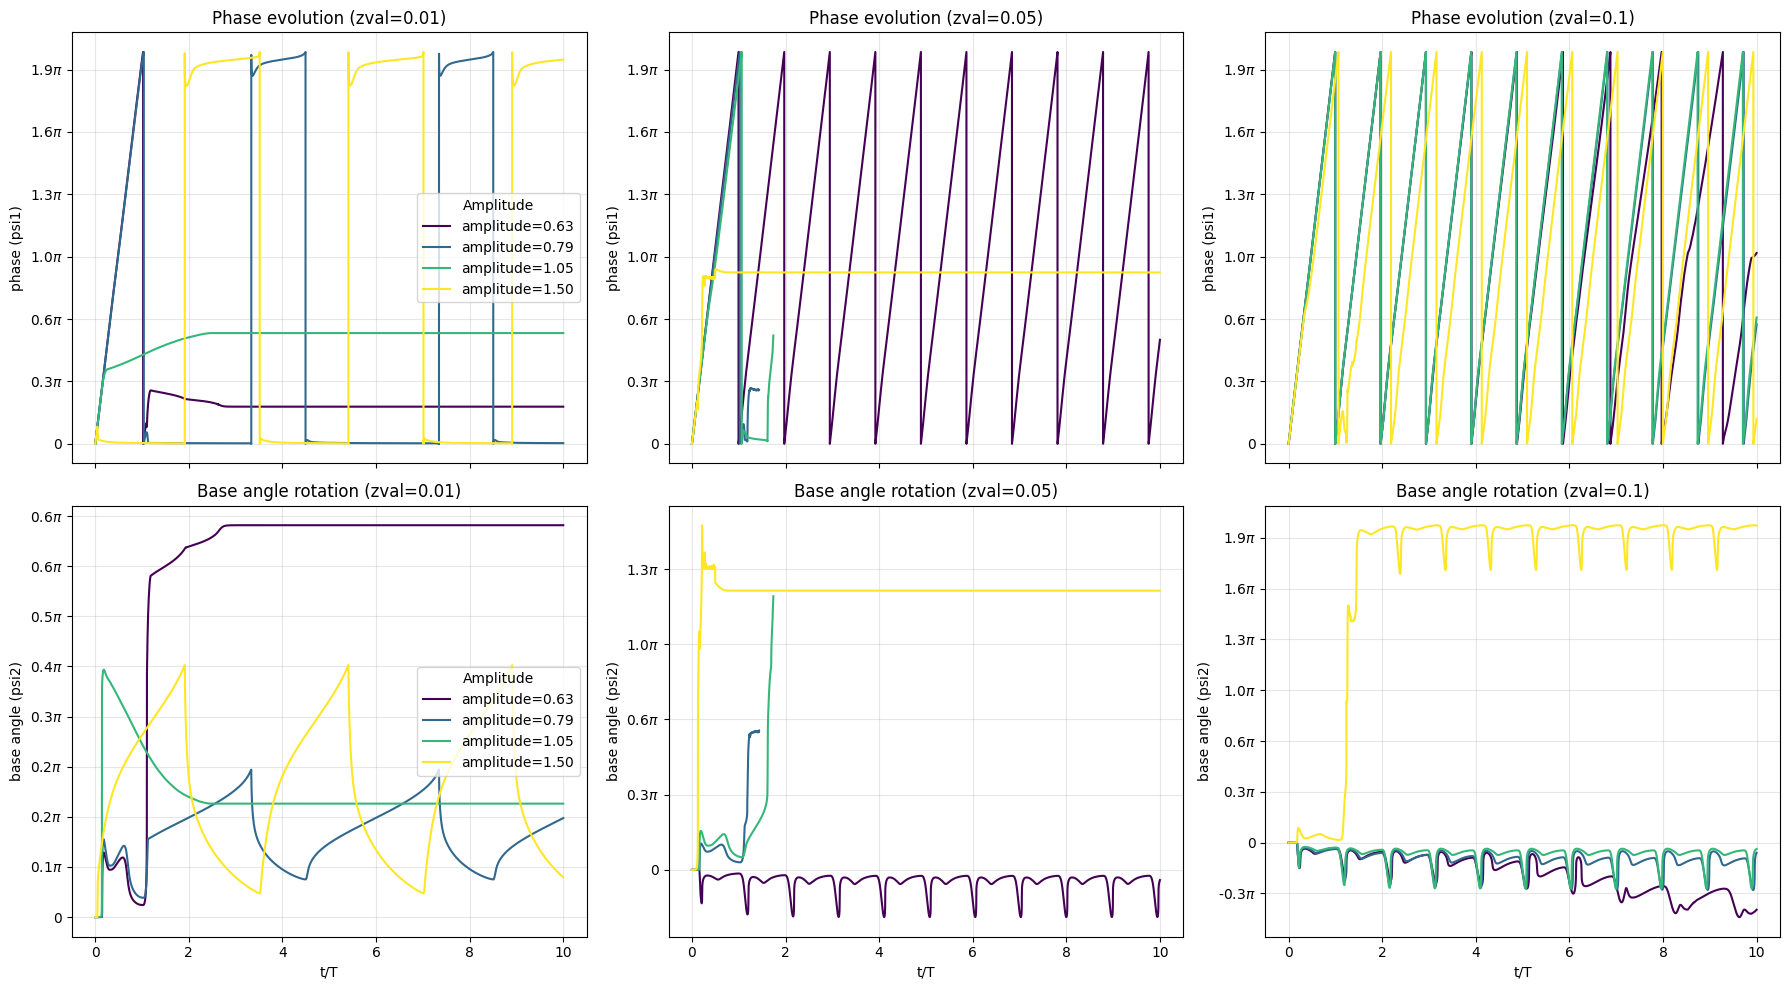

In [11]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.cm import get_cmap

# Directory containing simulation data
base_dir = '../data/'

# Regex to match simulation folders (ignore WGF)
folder_pattern = re.compile(r'zval([\d.]+)_theta([\d.]+)$')

# Find all simulation folders
sim_folders = [f for f in os.listdir(base_dir) if folder_pattern.match(f)]

# Organize by zval (phase delay) and theta (amplitude)
sim_dict = {}
for folder in sim_folders:
    match = folder_pattern.match(folder)
    if match:
        zval = float(match.group(1))
        theta = float(match.group(2))
        amplitude = np.pi / theta
        if zval not in sim_dict:
            sim_dict[zval] = []
        sim_dict[zval].append({'theta': theta, 'amplitude': amplitude, 'folder': folder})

# Sort phase delays and amplitudes
zvals = sorted(sim_dict.keys())
num_zvals = len(zvals)

fig, axes = plt.subplots(2, num_zvals, figsize=(6*num_zvals, 10), sharex='col')
if num_zvals == 1:
    axes = np.array([[axes[0]], [axes[1]]])  # Ensure axes is 2D for single column

for col, zval in enumerate(zvals):
    sims = sorted(sim_dict[zval], key=lambda x: x['amplitude'])
    cmap = get_cmap('viridis', len(sims))
    for idx, sim in enumerate(sims):
        folder = sim['folder']
        amplitude = sim['amplitude']
        sim_path = os.path.join(base_dir, folder, '20250602')
        dat_files = [f for f in os.listdir(sim_path) if f.endswith('true_states.dat')]
        if not dat_files:
            continue
        data = np.loadtxt(os.path.join(sim_path, dat_files[0]))
        time = data[:, 0] / 5000.0
        psi1 = np.mod(data[:, 2], 2 * np.pi)
        psi2 = data[:, 3]
        # Plot psi1 (phase) in first row
        axes[0, col].plot(time, psi1, label=f"amplitude={amplitude:.2f}", color=cmap(idx))
        # Plot psi2 (base angle rotation) in second row
        axes[1, col].plot(time, psi2, label=f"amplitude={amplitude:.2f}", color=cmap(idx))
    # Formatting for psi1
    axes[0, col].set_title(f'Phase evolution (zval={zval})')
    axes[0, col].set_ylabel('phase (psi1)')
    axes[0, col].grid(True, alpha=0.3)
    axes[0, col].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x/np.pi:.1f}$\\pi$" if x != 0 else "0"))
    # Formatting for psi2
    axes[1, col].set_title(f'Base angle rotation (zval={zval})')
    axes[1, col].set_ylabel('base angle (psi2)')
    axes[1, col].grid(True, alpha=0.3)
    axes[1, col].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x/np.pi:.1f}$\\pi$" if x != 0 else "0"))
    axes[1, col].set_xlabel('t/T')
    # Only add legend to the first column
    if col == 0:
        axes[0, col].legend(title='Amplitude', loc='best')
        axes[1, col].legend(title='Amplitude', loc='best')
plt.tight_layout()
plt.show()